In [1]:
import matplotlib.pyplot as plt
import os
# Global Settings for Matplotlib
plt.rcParams.update({
    'text.usetex': True,              # Enable LaTeX rendering for text
    'font.family': 'serif',           # Set font family
    'font.size': 18,                  # General font size
    'lines.markersize': 10,           # Default marker size
    'legend.fontsize': 'small',       # Legend font size
    'legend.frameon': False,          # Remove frame around legend
    'figure.figsize': (6, 5),         # Default figure size
    'axes.grid': True,                # Enable grid for axes
    'grid.alpha': 0.1,                # Set grid transparency
    'grid.linestyle': '--',           # Set grid line style
    'grid.color': 'gray',             # Set grid line color
    'axes.grid.which': 'both',        # Enable both major and minor gridlines
    'axes.grid.axis': 'both',         # Apply grid to both x and y axes
    'axes.labelsize': 22,             # Font size for axis labels
    'xtick.labelsize': 13,            # Font size for x-axis tick labels
    'ytick.labelsize': 13             # Font size for y-axis tick labels
})


user_home = os.path.expanduser("~")
graphs = user_home + r'\OneDrive - Bar-Ilan University - Students\Data\Crosstalk\graphs_for_paper\\'

In [2]:

def fisher_matrix(t, w, a, shots):
    def p(t, w, a):

        return 1 / 2 * (1 + np.cos(w * t) * np.exp(-a * t))

    def pw(t, w, a):
        return - 1 / 2 * t * np.sin(w * t) * np.exp(-a * t)

    def pww(t, w, a):
        return - 1 / 2 * t ** 2 * np.cos(w * t) * np.exp(-a * t)

    def pa(t, w, a):
        return - 1 / 2 * t * np.cos(w * t) * np.exp(-a * t)

    def paa(t, w, a):
        return 1 / 2 * t ** 2 * np.cos(w * t) * np.exp(-a * t)

    def paw(t, w, a):
        return 1 / 2 * t ** 2 * np.sin(w * t) * np.exp(-a * t)
    Iww = 0
    Iaa = 0
    Iwa = 0

    for i in range(len(t)):
        p0 = p(t[i], w, a)
        p1 = 1 - p0
        pw0 = pw(t[i], w, a)
        pw1 = -pw0
        pww0 = pww(t[i], w, a)
        pww1 = -pww0
        pa0 = pa(t[i], w, a)
        pa1 = -pa0
        paa0 = paa(t[i], w, a)
        paa1 = -paa0
        paw0 = paw(t[i], w, a)
        paw1 = -paw0

        if p0 == 0:
            p0 = 1e-10
        if p1 == 0:
            p1 = 1e-10

        Iww += shots[i] * (p0 * ((pw0 ** 2) / p0 ** 2) + p1 * ((pw1 ** 2) / p1 ** 2))
        Iaa += shots[i] * (p0 * ((pa0 ** 2) / p0 ** 2) + p1 * ((pa1 ** 2) / p1 ** 2))
        Iwa += shots[i] * (p0 * ((pw0 * pa0) / p0 ** 2) + p1 * ((pw1 * pa1) / p1 ** 2))
    return np.array([[Iww, Iwa], [Iwa, Iaa]])


def rao_bound_complex(T, a, sigma):
    I = 0
    for t in T:
        I += 1 / (sigma ** 2) * t ** 2 * np.exp(-2 * t * a)
    bound = 1 / np.sqrt(I)
    return bound


def rao_bound(T, w, a, shots):
    f_mat = fisher_matrix(T, w, a, shots)
    try :
        inv = np.linalg.inv(f_mat)
    except:
        return 100
    # inv = np.linalg.inv(f_mat)
    inv = inv.reshape(2,2)
    w_var = np.sqrt(inv[0, 0])
    a_var = np.sqrt(inv[1, 1])
    #
    # return w_var
    return a_var, w_var
    # return np.mean([w_var/w, a_var/a])
    # w_var = inv[0, 0]
    # a_var = inv[1, 1]
    # return np.sqrt(np.mean([w_var, a_var]))


def rao_bound_gausian(T, w, a, sigma):
    # Idw = 0
    # Ida = 0

    Iww = 0
    Iaa = 0
    Iwa = 0

    for t in T:
        # Idw += -t*np.sin(w*t)*np.exp(-a*t)
        # Ida += -t*np.cos(w*t)*np.exp(-a*t)
        Iww += t**2*np.sin(w*t)**2*np.exp(-2*a*t)
        Iaa += t**2*np.cos(w*t)**2*np.exp(-2*a*t)
        Iwa += t**2*np.sin(w*t)*np.cos(w*t)*np.exp(-2*a*t)

    Iww /= sigma**2
    Iaa /= sigma**2
    Iwa /= sigma**2
    f_mat = np.array([[Iww, Iwa], [Iwa, Iaa]])


    try :
        inv = np.linalg.inv(f_mat)
    except:
        return 100 , 100
    # inv = np.linalg.inv(f_mat)
    # inv = inv.reshape(2,2)
    w_var = np.sqrt(inv[0, 0])
    a_var = np.sqrt(inv[1, 1])
    return a_var, w_var

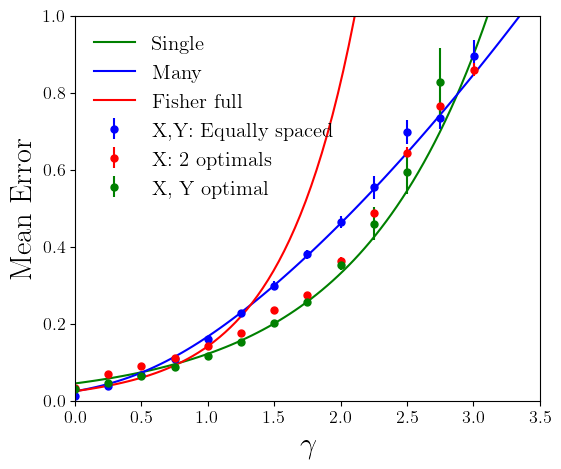

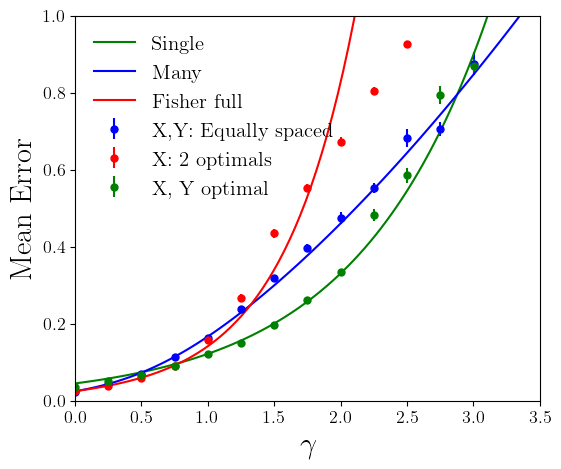

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
# Analytical calculations for error bounds
# Load datasets
a_file = pd.read_excel(graphs + 'stability-Decay_a.xlsx')
w_file = pd.read_excel(graphs + 'stability-Decay_w.xlsx')

# Assign columns to variables for "a" dataset
shots_a = a_file["shots"].values
Decay_a = a_file["Decay"].values
errors_fisher_median_a = a_file["errors_fisher_median_a"].values
errors_fisher_std_a = a_file["errors_fisher_std_a"].values
errors_local_median_a = a_file["errors_local_median_a"].values
errors_local_std_a = a_file["errors_local_std_a"].values
errors_uniform_median_a = a_file["errors_uniform_median_a"].values
errors_uniform_std_a = a_file["errors_uniform_std_a"].values

# Assign columns to variables for "w" dataset
shots_w = w_file["shots"].values
Decay_w = w_file["Decay"].values
errors_fisher_median_w = w_file["errors_fisher_median_w"].values
errors_fisher_std_w = w_file["errors_fisher_std_w"].values
errors_local_median_w = w_file["errors_local_median_w"].values
errors_local_std_w = w_file["errors_local_std_w"].values
errors_uniform_median_w = w_file["errors_uniform_median_w"].values
errors_uniform_std_w = w_file["errors_uniform_std_w"].values

# Plot settings
plt.figure()


N = 1000/2
t_max = np.pi
samples = 20
t = 1
t_fisher = [0.4439410861020235, 1.784695781691183]
T_many = np.linspace(0, t_max, samples)

sigma_single = 1 / np.sqrt(N)
sigma_many = 1 / np.sqrt(N / (samples))
sigma_fisher = 1 / np.sqrt(N)
Gamma = np.linspace(0, 4, 100)

error_single = []
error_many = []
error_fisher = []
error_fisher_full = []
for g in Gamma:
    error_single.append(rao_bound_complex([t], g, sigma_single))
    error_many.append(rao_bound_complex(T_many, g, sigma_many))
    error_fisher.append(rao_bound_gausian(t_fisher, 1, g, sigma_fisher)[1])
    error_fisher_full.append(rao_bound(t_fisher, 1, g, [N, N])[1])
def plot_a():
    plt.plot(Gamma, error_single, label='Single', color='green')
    plt.plot(Gamma, error_many, label='Many', color='blue')
    plt.plot(Gamma, error_fisher_full, label='Fisher full', color = 'red')


# Plot error bars for "a" dataset
plot_a()
plt.errorbar(Decay_a, np.array(errors_uniform_median_a), yerr=np.array(errors_uniform_std_a),
             fmt='o', color='blue', label='X,Y: Equally spaced', markersize=5)
plt.errorbar(Decay_a, np.array(errors_fisher_median_a), yerr=np.array(errors_fisher_std_a),
             fmt='o', color='red', label='X: 2 optimals', markersize=5)
plt.errorbar(Decay_a, np.array(errors_local_median_a), yerr=np.array(errors_local_std_a),
             fmt='o', color='green', label='X, Y optimal', markersize=5)

plt.xlabel('$\gamma$')
plt.ylabel('Mean Error')
plt.legend()
plt.xlim([0, 3.5])
plt.ylim([0, 1])
plt.grid(False)
plt.savefig(os.path.join(graphs, "decay_errors_optimal_a.png"))
plt.figure()

plt.errorbar(Decay_w, np.array(errors_uniform_median_w), yerr= np.array(errors_uniform_std_w),
             fmt='o', color='blue', label='X,Y: Equally spaced', markersize=5)
plt.errorbar(Decay_w, np.array(errors_fisher_median_w), yerr= np.array(errors_fisher_std_w ),
             fmt='o', color='red', label='X: 2 optimals', markersize=5)
plt.errorbar(Decay_w,  np.array(errors_local_median_w), yerr= np.array(errors_local_std_w ), fmt='o',
             color='green', label='X, Y optimal', markersize=5)
plot_a()
# Final plot adjustments
plt.xlabel('$\gamma$')
plt.ylabel('Mean Error')
plt.legend()
plt.xlim([0, 3.5])
plt.ylim([0, 1])
# plt.tight_layout()
plt.grid(False)
plt.savefig(os.path.join(graphs, "decay_errors_optimal_w.png"))
plt.show()


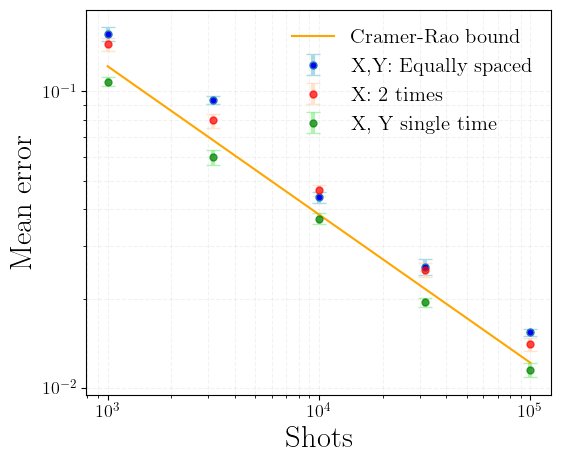

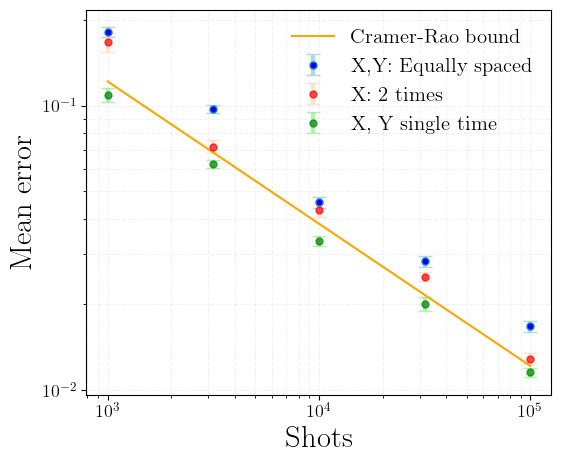

In [4]:
# Data Load Paths
user_home = os.path.expanduser("~")
file_path_a = os.path.join(graphs, 'errors_optimal_a.xlsx')
file_path_w = os.path.join(graphs, 'errors_optimal_w.xlsx')

# Load Data for Decay Error (A)
data_a = pd.read_excel(file_path_a)
shots = data_a["shots"].values
errors_fisher_median_a = data_a["errors_fisher_median_a"].values
errors_fisher_std_a = data_a["errors_fisher_std_a"].values
errors_local_median_a = data_a["errors_local_median_a"].values
errors_local_std_a = data_a["errors_local_std_a"].values
errors_uniform_median_a = data_a["errors_uniform_median_a"].values
errors_uniform_std_a = data_a["errors_uniform_std_a"].values

# Load Data for Frequency Error (W)
data_w = pd.read_excel(file_path_w)
errors_fisher_median_w = data_w["errors_fisher_median_w"].values
errors_fisher_std_w = data_w["errors_fisher_std_w"].values
errors_local_median_w = data_w["errors_local_median_w"].values
errors_local_std_w = data_w["errors_local_std_w"].values
errors_uniform_median_w = data_w["errors_uniform_median_w"].values
errors_uniform_std_w = data_w["errors_uniform_std_w"].values

# Plot Frequency Error (W)
plt.figure()
plt.errorbar(shots, errors_uniform_median_w, yerr=errors_uniform_std_w, fmt='o', capsize=5,
             ecolor='lightblue', elinewidth=3, markerfacecolor='blue', markersize=5, label='X,Y: Equally spaced')
plt.errorbar(shots, errors_fisher_median_w, yerr=errors_fisher_std_w, fmt='o', capsize=5,
             ecolor='peachpuff', elinewidth=3, color='red', markersize=5, label='X: 2 times', alpha=0.7)
plt.errorbar(shots, errors_local_median_w, yerr=errors_local_std_w, fmt='o', capsize=5,
             ecolor='lightgreen', elinewidth=3, color='green', markersize=5, label='X, Y single time', alpha=0.7)
plt.plot(shots, np.e / np.sqrt(shots / 2), '-', label='Cramer-Rao bound', color='orange')
plt.xlabel('Shots')
plt.ylabel('Mean error')
plt.yscale('log')
plt.xscale('log')
# plt.title("Frequency Error")
plt.legend()
plt.savefig(os.path.join(graphs, "shots_errors_optimal_w.png"))

# Plot Decay Error (A)
plt.figure()
plt.errorbar(shots, errors_uniform_median_a, yerr=errors_uniform_std_a, fmt='o', capsize=5,
             ecolor='lightblue', elinewidth=3, markerfacecolor='blue', markersize=5, label='X,Y: Equally spaced')
plt.errorbar(shots, errors_fisher_median_a, yerr=errors_fisher_std_a, fmt='o', capsize=5,
             ecolor='peachpuff', elinewidth=3, color='red', markersize=5, label='X: 2 times', alpha=0.7)
plt.errorbar(shots, errors_local_median_a, yerr=errors_local_std_a, fmt='o', capsize=5,
             ecolor='lightgreen', elinewidth=3, color='green', markersize=5, label='X, Y single time', alpha=0.7)
plt.plot(shots, np.e / np.sqrt(shots / 2), '-', label='Cramer-Rao bound', color='orange')
plt.xlabel('Shots')
plt.ylabel('Mean error')
plt.yscale('log')
plt.xscale('log')
# plt.title("Decay Error")
plt.legend()
plt.savefig(os.path.join(graphs, "shots_errors_optimal_a.png"))

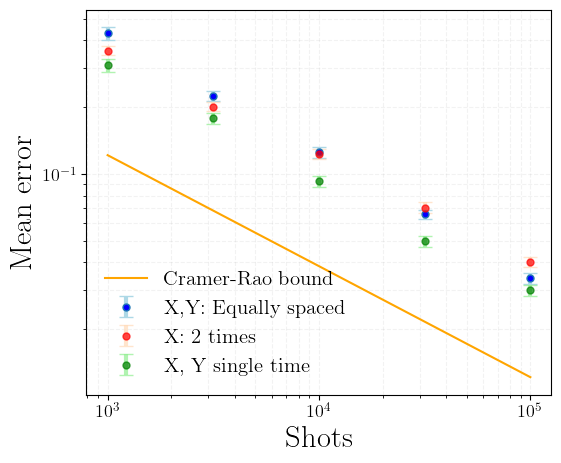

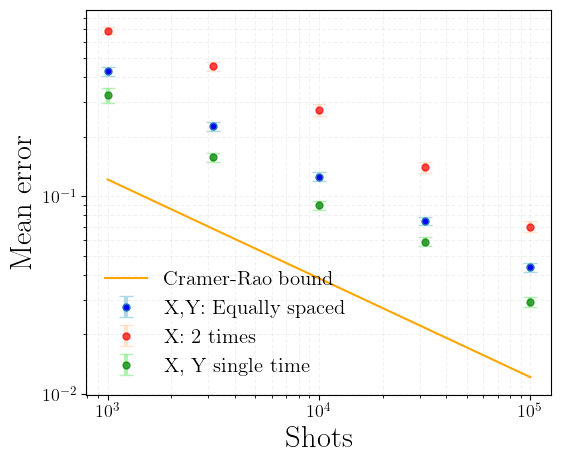

In [5]:
# Data Load Paths
user_home = os.path.expanduser("~")
file_path_a = os.path.join(graphs, 'errors_non_optimal_a.xlsx')
file_path_w = os.path.join(graphs, 'errors_non_optimal_w.xlsx')

# Load Data for Decay Error (A)
data_a = pd.read_excel(file_path_a)
shots = data_a["shots"].values
errors_fisher_median_a = data_a["errors_fisher_median_a"].values
errors_fisher_std_a = data_a["errors_fisher_std_a"].values
errors_local_median_a = data_a["errors_local_median_a"].values
errors_local_std_a = data_a["errors_local_std_a"].values
errors_uniform_median_a = data_a["errors_uniform_median_a"].values
errors_uniform_std_a = data_a["errors_uniform_std_a"].values

# Load Data for Frequency Error (W)
data_w = pd.read_excel(file_path_w)
errors_fisher_median_w = data_w["errors_fisher_median_w"].values
errors_fisher_std_w = data_w["errors_fisher_std_w"].values
errors_local_median_w = data_w["errors_local_median_w"].values
errors_local_std_w = data_w["errors_local_std_w"].values
errors_uniform_median_w = data_w["errors_uniform_median_w"].values
errors_uniform_std_w = data_w["errors_uniform_std_w"].values

# Plot Frequency Error (W)
plt.figure()
plt.errorbar(shots, errors_uniform_median_w, yerr=errors_uniform_std_w, fmt='o', capsize=5,
             ecolor='lightblue', elinewidth=3, markerfacecolor='blue', markersize=5, label='X,Y: Equally spaced')
plt.errorbar(shots, errors_fisher_median_w, yerr=errors_fisher_std_w, fmt='o', capsize=5,
             ecolor='peachpuff', elinewidth=3, color='red', markersize=5, label='X: 2 times', alpha=0.7)
plt.errorbar(shots, errors_local_median_w, yerr=errors_local_std_w, fmt='o', capsize=5,
             ecolor='lightgreen', elinewidth=3, color='green', markersize=5, label='X, Y single time', alpha=0.7)
plt.plot(shots, np.e / np.sqrt(shots / 2), '-', label='Cramer-Rao bound', color='orange')
plt.xlabel('Shots')
plt.ylabel('Mean error')
plt.yscale('log')
plt.xscale('log')
# plt.title("Frequency Error")
plt.legend()
plt.savefig(os.path.join(graphs, "shots_errors_non_optimal_w.png"))

# Plot Decay Error (A)
plt.figure()
plt.errorbar(shots, errors_uniform_median_a, yerr=errors_uniform_std_a, fmt='o', capsize=5,
             ecolor='lightblue', elinewidth=3, markerfacecolor='blue', markersize=5, label='X,Y: Equally spaced')
plt.errorbar(shots, errors_fisher_median_a, yerr=errors_fisher_std_a, fmt='o', capsize=5,
             ecolor='peachpuff', elinewidth=3, color='red', markersize=5, label='X: 2 times', alpha=0.7)
plt.errorbar(shots, errors_local_median_a, yerr=errors_local_std_a, fmt='o', capsize=5,
             ecolor='lightgreen', elinewidth=3, color='green', markersize=5, label='X, Y single time', alpha=0.7)
plt.plot(shots, np.e / np.sqrt(shots / 2), '-', label='Cramer-Rao bound', color='orange')
plt.xlabel('Shots')
plt.ylabel('Mean error')
plt.yscale('log')
plt.xscale('log')
# plt.title("Decay Error")
plt.legend()
plt.savefig(os.path.join(graphs, "shots_errors_non_optimal_a.png"))

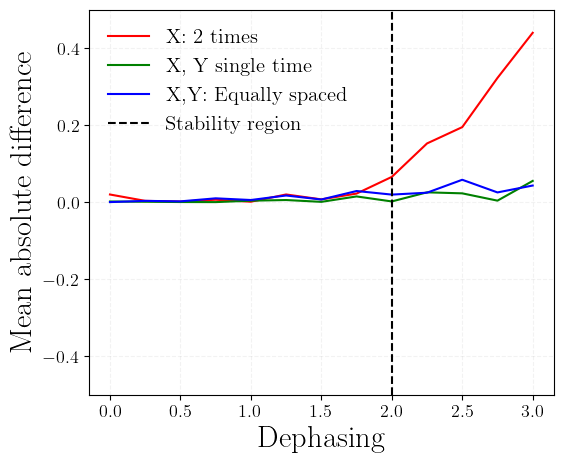

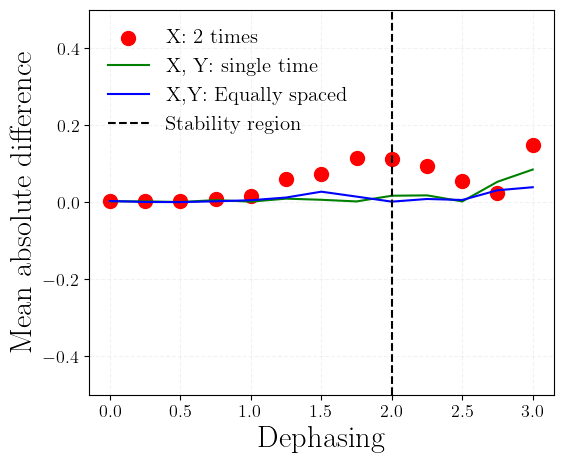

In [16]:
###Stability Region
file_path= os.path.join(graphs, 'Unbiased_estimator.xlsx')

# Load Data for Decay Error (A)
data_a = pd.read_excel(file_path)
fisher_a_mean = data_a["fisher_a_mean"].values
fisher_a_std = data_a["fisher_a_std"].values
local_a_mean = data_a["local_a_mean"].values
local_a_std = data_a["local_a_std"].values
uniform_a_mean = data_a["uniform_a_mean"].values
uniform_a_std = data_a["uniform_a_std"].values
fisher_w_mean = data_a["fisher_w_mean"].values
fisher_w_std = data_a["fisher_w_std"].values
local_w_mean = data_a["local_w_mean"].values
local_w_std = data_a["local_w_std"].values
uniform_w_mean = data_a["uniform_w_mean"].values
uniform_w_std = data_a["uniform_w_std"].values
Decay = data_a["Decay"].values


# plt.plot(Decay,decay_fit_t_mean,label='fit')
# plt.scatter(Decay, fisher_a_mean, label='param')
plt.plot(Decay, (np.abs(fisher_a_mean-Decay)), label='X: 2 times', color='red')
plt.plot(Decay, (np.abs(local_a_mean-Decay)), label='X, Y single time', color='green')
plt.plot(Decay, (np.abs(uniform_a_mean-Decay)), label='X,Y: Equally spaced', color='blue')


plt.axline([2, -1], [2, 1], color='black', linestyle='--', label='Stability region')
# plt.errorbar(Decay, Decay/fisher_a_mean, yerr=fisher_a_std, label='param')
plt.ylim([-0.5, 0.5])
plt.xlabel('Dephasing')
plt.ylabel('Mean absolute difference')
plt.legend()
plt.savefig(os.path.join(graphs, "Unbiased_estimator_A.png"))

plt.figure()
plt.scatter(Decay, (np.abs(fisher_w_mean-1)), label='X: 2 times', color='red')
plt.plot(Decay, (np.abs(local_w_mean-1)), label='X, Y: single time', color='green')
plt.plot(Decay, (np.abs(uniform_w_mean-1)), label='X,Y: Equally spaced', color='blue')
plt.axline([2, -1], [2, 1], color='black', linestyle='--', label='Stability region')
plt.ylim([-0.5, 0.5])
plt.xlabel('Dephasing')
plt.ylabel('Mean absolute difference')
plt.legend()
plt.savefig(os.path.join(graphs, "Unbiased_estimator_W.png"))
